In [47]:
#following this tutorial http://www.wildml.com/2015/09/implementing-a-neural-network-from-scratch/

In [48]:

import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib
from jupyterthemes import jtplot
jtplot.reset()
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

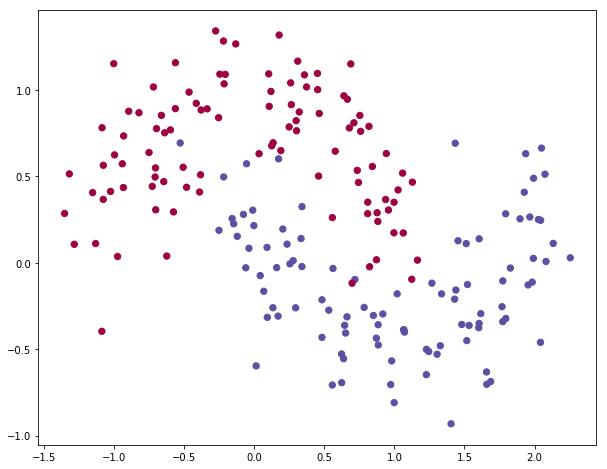

In [49]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [50]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5,1,'Logistic Regression')

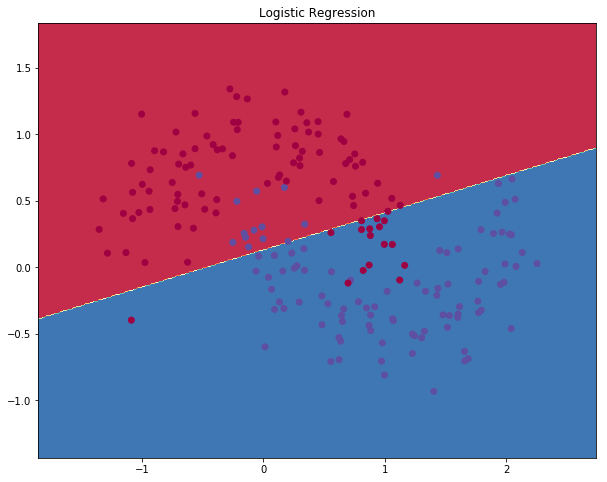

In [51]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X, y)
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

In [52]:
num_examples = len(X) # training set size
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength

In [53]:

# Helper function to evaluate the total loss on the dataset
def calculate_loss(model):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation to calculate our predictions
    z1 = X.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # Calculating the loss
    corect_logprobs = -np.log(probs[range(num_examples), y])
    data_loss = np.sum(corect_logprobs)
    # Add regulatization term to loss (optional)
    data_loss += reg_lambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2)))
    return 1./num_examples * data_loss

In [54]:

# Helper function to predict an output (0 or 1)
def predict(model, x):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    # Forward propagation
    z1 = x.dot(W1) + b1
    a1 = np.tanh(z1)
    z2 = a1.dot(W2) + b2
    exp_scores = np.exp(z2)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    return np.argmax(probs, axis=1)

In [55]:
#  This function learns parameters for the neural network and returns the model.
# - nn_hdim: Number of nodes in the hidden layer
# - num_passes: Number of passes through the training data for gradient descent
# - print_loss: If True, print the loss every 1000 iterations
def build_model(nn_hdim, num_passes=20000, print_loss=False):
    
    # Initialize the parameters to random values. We need to learn these.
    np.random.seed(0)
    W1 = np.random.randn(nn_input_dim, nn_hdim) / np.sqrt(nn_input_dim)
    b1 = np.zeros((1, nn_hdim))
    W2 = np.random.randn(nn_hdim, nn_output_dim) / np.sqrt(nn_hdim)
    b2 = np.zeros((1, nn_output_dim))

    # This is what we return at the end
    model = {}
    
    # Gradient descent. For each batch...
    for i in range(0, num_passes):

        # Forward propagation
        z1 = X.dot(W1) + b1
        a1 = np.tanh(z1)
        z2 = a1.dot(W2) + b2
        exp_scores = np.exp(z2)
        probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

        # Backpropagation
        delta3 = probs
        delta3[range(num_examples), y] -= 1
        dW2 = (a1.T).dot(delta3)
        db2 = np.sum(delta3, axis=0, keepdims=True)
        delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta2)
        db1 = np.sum(delta2, axis=0)

        # Add regularization terms (b1 and b2 don't have regularization terms)
        dW2 += reg_lambda * W2
        dW1 += reg_lambda * W1

        # Gradient descent parameter update
        W1 += -epsilon * dW1
        b1 += -epsilon * db1
        W2 += -epsilon * dW2
        b2 += -epsilon * db2
        
        # Assign new parameters to the model
        model = { 'W1': W1, 'b1': b1, 'W2': W2, 'b2': b2}
        
        # Optionally print the loss.
        # This is expensive because it uses the whole dataset, so we don't want to do it too often.
        if print_loss and i % 1000 == 0:
          print("Loss after iteration %i: %f" %(i, calculate_loss(model)))
    
    return model

Loss after iteration 0: 0.432387
Loss after iteration 1000: 0.068947
Loss after iteration 2000: 0.069033
Loss after iteration 3000: 0.070752
Loss after iteration 4000: 0.070748
Loss after iteration 5000: 0.070751
Loss after iteration 6000: 0.070754
Loss after iteration 7000: 0.070756
Loss after iteration 8000: 0.070757
Loss after iteration 9000: 0.070758
Loss after iteration 10000: 0.070758
Loss after iteration 11000: 0.070758
Loss after iteration 12000: 0.070758
Loss after iteration 13000: 0.070758
Loss after iteration 14000: 0.070758
Loss after iteration 15000: 0.070758
Loss after iteration 16000: 0.070758
Loss after iteration 17000: 0.070758
Loss after iteration 18000: 0.070758
Loss after iteration 19000: 0.070758


Text(0.5,1,'Decision Boundary for hidden layer size 3')

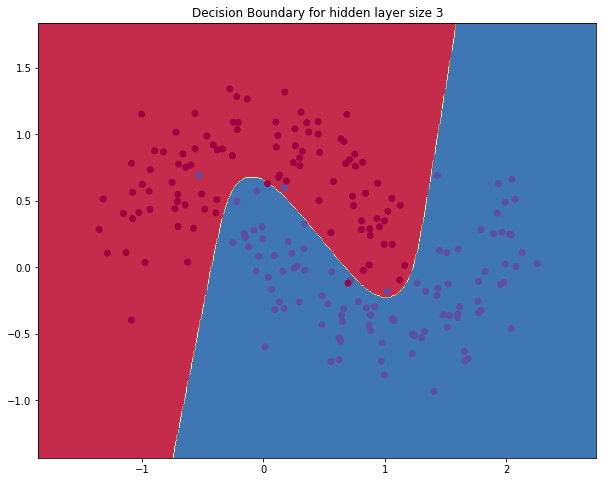

In [56]:

# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

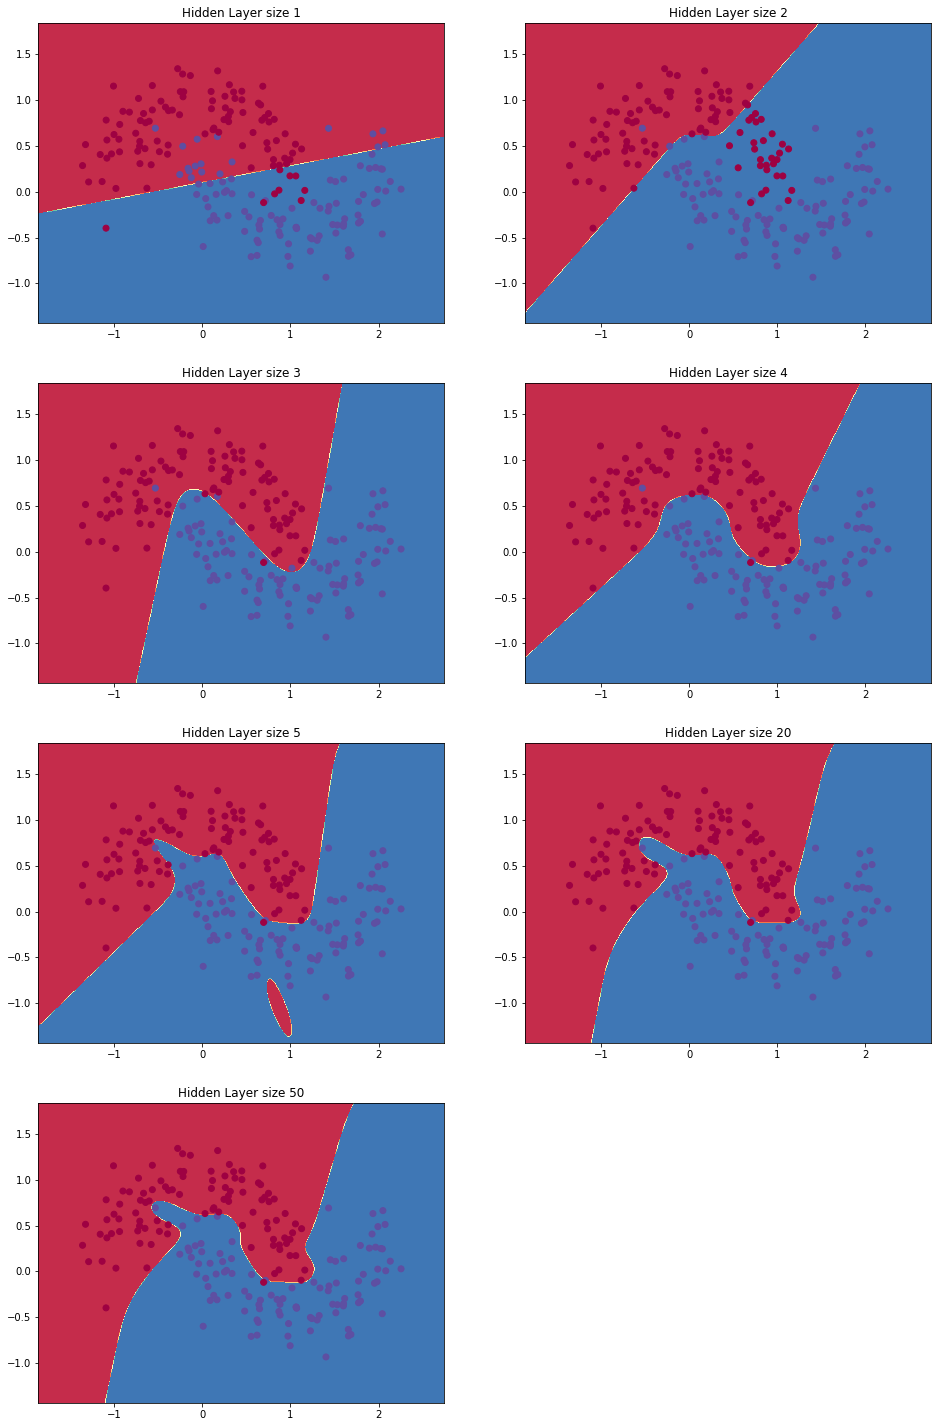

In [57]:
plt.figure(figsize=(16, 32))
hidden_layer_dimensions = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hidden_layer_dimensions):
    plt.subplot(5, 2, i+1)
    plt.title('Hidden Layer size %d' % nn_hdim)
    model = build_model(nn_hdim)
    plot_decision_boundary(lambda x: predict(model, x))
plt.show()

In [58]:
from sklearn import datasets
iris = datasets.load_iris()


In [59]:
X = iris.data[:,[1,2,3]]
y = iris.target
X.shape,y.shape
X[:,0]

array([ 3.5,  3. ,  3.2,  3.1,  3.6,  3.9,  3.4,  3.4,  2.9,  3.1,  3.7,
        3.4,  3. ,  3. ,  4. ,  4.4,  3.9,  3.5,  3.8,  3.8,  3.4,  3.7,
        3.6,  3.3,  3.4,  3. ,  3.4,  3.5,  3.4,  3.2,  3.1,  3.4,  4.1,
        4.2,  3.1,  3.2,  3.5,  3.1,  3. ,  3.4,  3.5,  2.3,  3.2,  3.5,
        3.8,  3. ,  3.8,  3.2,  3.7,  3.3,  3.2,  3.2,  3.1,  2.3,  2.8,
        2.8,  3.3,  2.4,  2.9,  2.7,  2. ,  3. ,  2.2,  2.9,  2.9,  3.1,
        3. ,  2.7,  2.2,  2.5,  3.2,  2.8,  2.5,  2.8,  2.9,  3. ,  2.8,
        3. ,  2.9,  2.6,  2.4,  2.4,  2.7,  2.7,  3. ,  3.4,  3.1,  2.3,
        3. ,  2.5,  2.6,  3. ,  2.6,  2.3,  2.7,  3. ,  2.9,  2.9,  2.5,
        2.8,  3.3,  2.7,  3. ,  2.9,  3. ,  3. ,  2.5,  2.9,  2.5,  3.6,
        3.2,  2.7,  3. ,  2.5,  2.8,  3.2,  3. ,  3.8,  2.6,  2.2,  3.2,
        2.8,  2.8,  2.7,  3.3,  3.2,  2.8,  3. ,  2.8,  3. ,  2.8,  3.8,
        2.8,  2.8,  2.6,  3. ,  3.4,  3.1,  3. ,  3.1,  3.1,  3.1,  2.7,
        3.2,  3.3,  3. ,  2.5,  3. ,  3.4,  3. ])

In [65]:
num_examples = len(X) # training set size
nn_input_dim = 3 # input layer dimensionality
nn_output_dim = 3 # output layer dimensionality

# Gradient descent parameters (I picked these by hand)
epsilon = 0.01 # learning rate for gradient descent
reg_lambda = 0.01 # regularization strength
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y,pred_func, resolution=0.02):
    
    markers = ('s', 'x', 'o', '^', 'v')
    colors =  ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
#     x1Min, x1Max = X[:, 0].min()-1, X[:, 0].max()+1
#     x2Min, x2Max = X[:, 1].min()-1, X[:, 1].max()+1
#     xx1, xx2 = np.meshgrid(np.arange(x1Min, x1Max, resolution),
#                            np.arange(x2Min, x2Max, resolution))
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = predict(model,np.c_[xx1.ravel(), xx2.ravel()])
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],
                    y=X[y==cl,1],
                   alpha=0.8,
                   c=colors[idx],
                   marker=markers[idx],
                   label=cl,
                   edgecolor='black')
        
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [66]:
# Build a model with a 3-dimensional hidden layer
model = build_model(3, print_loss=True)
# Plot the decision boundary
plot_decision_regions(X,y,lambda x: predict(model, x))
# plot_decision_boundary(lambda x: predict(model, x))
plt.title("Decision Boundary for hidden layer size 3")

Loss after iteration 0: 1.278180
Loss after iteration 1000: 1.104175
Loss after iteration 2000: 1.103082
Loss after iteration 3000: 1.102271
Loss after iteration 4000: 1.101622
Loss after iteration 5000: 1.101096
Loss after iteration 6000: 1.100666
Loss after iteration 7000: 1.100313
Loss after iteration 8000: 1.100023
Loss after iteration 9000: 1.099784
Loss after iteration 10000: 1.099585
Loss after iteration 11000: 1.099417
Loss after iteration 12000: 1.099263
Loss after iteration 13000: 0.462152
Loss after iteration 14000: 0.465514
Loss after iteration 15000: 0.465083
Loss after iteration 16000: 0.464823
Loss after iteration 17000: 0.464629
Loss after iteration 18000: 0.464474
Loss after iteration 19000: 1.105718


ValueError: shapes (86900,2) and (3,3) not aligned: 2 (dim 1) != 3 (dim 0)